In [1]:
print("hello")

hello


In [2]:
import pandas as pd

In [3]:
updatedData = pd.read_csv('updatedData.csv')

In [4]:
updatedData.head()

,DATE,TOTAL CASES,NEW CASES,TOTAL RECOVERED,TOTAL DEATHS,NEW DEATHS
0,02-03-20,1,1,0,0,0
1,03-03-20,2,1,0,0,0
2,04-03-20,2,0,0,0,0
3,05-03-20,2,0,0,0,0
4,06-03-20,2,0,0,0,0


In [5]:
data = updatedData.rename(columns={"DATE": "Date", "TOTAL CASES": "Total_cases","TOTAL RECOVERED" : "Total_Recovered","TOTAL DEATHS" : "Total_deaths"})
data.head()

,Date,Total_cases,NEW CASES,Total_Recovered,Total_deaths,NEW DEATHS
0,02-03-20,1,1,0,0,0
1,03-03-20,2,1,0,0,0
2,04-03-20,2,0,0,0,0
3,05-03-20,2,0,0,0,0
4,06-03-20,2,0,0,0,0


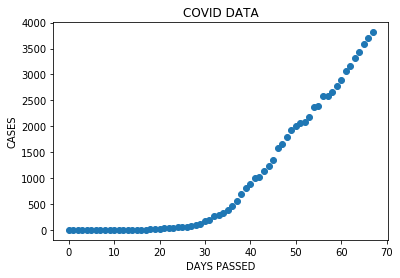

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Plot
plt.scatter(data.Date.index, data.Total_cases)
plt.title('COVID DATA')
plt.xlabel("DAYS PASSED")
plt.ylabel('CASES')
plt.show()

In [7]:
data.describe()

,Total_cases,NEW CASES,Total_Recovered,Total_deaths,NEW DEATHS
count,68.000000,68.000000,68.000000,68.000000,68.000000
mean,1015.764706,56.102941,341.294118,20.397059,1.573529
std,1221.955347,61.176803,576.752153,32.154543,3.082527
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6.250000,1.000000,3.000000,0.000000,0.000000
50%,308.000000,25.500000,21.000000,3.000000,0.000000
75%,2015.250000,106.000000,478.000000,30.000000,2.000000
max,3814.000000,225.000000,2176.000000,107.000000,13.000000


In [8]:
#Basic Analysis
#We can see that average new cases are around 57


In [9]:
#adding a column to the DataFrame which can be used to predict the total cases after x days 
a = []
for i in range(1,69):
  a.append(i)

data['Days_passed'] = a

In [10]:
data.head()

,Date,Total_cases,NEW CASES,Total_Recovered,Total_deaths,NEW DEATHS,Days_passed
0,02-03-20,1,1,0,0,0,1
1,03-03-20,2,1,0,0,0,2
2,04-03-20,2,0,0,0,0,3
3,05-03-20,2,0,0,0,0,4
4,06-03-20,2,0,0,0,0,5


In [11]:
#splitting the data into train and test.

X = np.array(data.Days_passed).reshape(-1, 1) 
y = np.array(data.Total_cases).reshape(-1, 1) 
 
from sklearn.model_selection import train_test_split     
from sklearn.linear_model import LinearRegression


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) 
  
#Applying Regression model
regr = LinearRegression() 
  
regr.fit(X_train, y_train) 
print(regr.score(X_test, y_test))

0.8435106033298936


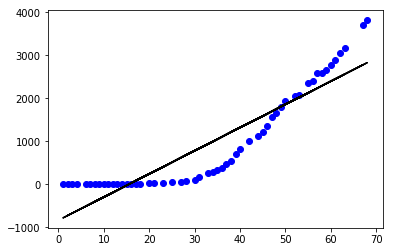

In [12]:
y_pred = regr.predict(X_train) 
plt.scatter(X_train, y_train, color ='b') 
plt.plot(X_train, y_pred, color ='k') 
  
plt.show() 

#We can see from the graph that our model is unerfitting and thus we have to make our model more complex

In [13]:
#According to Regression Model

#prdicting what would be total numbr of cases tommorrow
print(regr.predict([[69]]))

#Increase in Total no. of cases would be 
print(regr.predict([[69]]) - regr.predict([[68]]))

[[2882.39161604]]
[[53.84026406]]


In [14]:
data.describe()

,Total_cases,NEW CASES,Total_Recovered,Total_deaths,NEW DEATHS,Days_passed
count,68.000000,68.000000,68.000000,68.000000,68.000000,68.00000
mean,1015.764706,56.102941,341.294118,20.397059,1.573529,34.50000
std,1221.955347,61.176803,576.752153,32.154543,3.082527,19.77372
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.00000
25%,6.250000,1.000000,3.000000,0.000000,0.000000,17.75000
50%,308.000000,25.500000,21.000000,3.000000,0.000000,34.50000
75%,2015.250000,106.000000,478.000000,30.000000,2.000000,51.25000
max,3814.000000,225.000000,2176.000000,107.000000,13.000000,68.00000


In [15]:
#Applying Polynomial regression to our data set to increase the complexity of our model

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)  #degree = 2 implies max pow is 2
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly,y_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

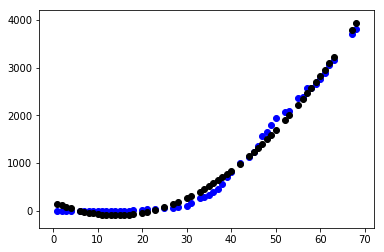

In [16]:
y_pred = lin_reg_2.predict(X_poly)
plt.scatter(X_train, y_train, color ='b')
plt.scatter(X_train, y_pred,color = 'k') 
  
plt.show() 

In [17]:
#According to Polynomial Regression Model

#Accuracy 
X_tpoly = poly_reg.fit_transform(X_test)
print(lin_reg_2.score(X_tpoly,y_test))


#prdicting what would be total numbr of cases tommorrow
print(lin_reg_2.predict(poly_reg.fit_transform([[69]])))

#Increase in Total no. of cases would be 
print(lin_reg_2.predict(poly_reg.fit_transform([[69]]))-lin_reg_2.predict(poly_reg.fit_transform([[68]])))

0.995788497990239
[[4089.16209116]]
[[150.98247085]]


In [18]:
#SVR

# Changing the data into standard scalar format or bringing the data into a range
from sklearn.preprocessing import StandardScaler,MinMaxScaler
sc_X = StandardScaler()
sv_x = sc_X.fit_transform(X_train)
sc_Y = StandardScaler()
sv_y = sc_Y.fit_transform(y_train)

/home/sushanth/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/sushanth/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/sushanth/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/sushanth/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


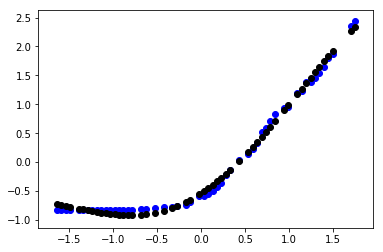

In [19]:
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf', C=1e3, gamma=0.1)  #Here we are using kernel as rbf which is good for our dataset
svr.fit(sv_x,sv_y.ravel())


y_pred = svr.predict(sv_x)
plt.scatter(sv_x, sv_y, color ='b')
plt.scatter(sv_x, y_pred,color = 'k') 
  
plt.show() 

In [20]:
sv_tx = sc_X.fit_transform(X_test)
sv_ty = sc_Y.fit_transform(y_test)
print(svr.score(sv_x, sv_y))
print(svr.score(sv_tx,sv_ty))

#printig the model accuracy on training and test data
#We can see that svr is overfitting as it is giving 99% accuracy for training data

0.995214917586204
0.9856605345866954


/home/sushanth/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/sushanth/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/sushanth/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/sushanth/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [21]:
#predicting the numer of cases today
predict = sc_Y.inverse_transform(svr.predict(sc_X.transform([[69]])))
print(predict)
#New cases
print(sc_Y.inverse_transform(svr.predict(sc_X.transform([[69]])))-sc_Y.inverse_transform(svr.predict(sc_X.transform([[68]]))))

[4147.73650331]
[122.38700034]


In [22]:
# DTR

#Applying Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=0)
dtr.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

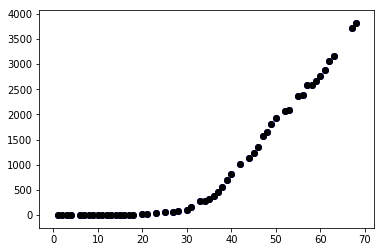

In [23]:
y_pred = dtr.predict(X_train)
plt.scatter(X_train, y_train, color ='b')
plt.scatter(X_train, y_pred,color = 'k') 
  
plt.show() 

In [24]:
print(dtr.score(X_train,y_train))
print(dtr.score(X_test,y_test))
dtr.predict([[69]])

#DTr is overfitting as it giving 100% accuracy 

1.0
0.9947799142064827


array([3814.])

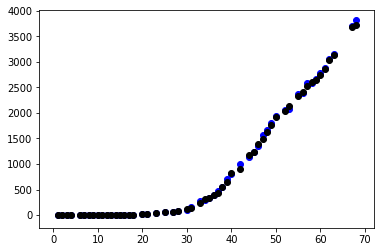

In [25]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 10,random_state=0)
rfr.fit(X_train,y_train.ravel())

y_pred = rfr.predict(X_train)
plt.scatter(X_train, y_train, color ='b')
plt.scatter(X_train, y_pred,color = 'k') 
  
plt.show() 

In [26]:
print(rfr.score(X_train,y_train))
print(rfr.score(X_test,y_test))
rfr.predict([[69]])

0.9992611764272079
0.9959069921590953


array([3716.6])

In [27]:
# No. of total cases 
print("linear Regression -- ",regr.predict([[69]]))
print("polynomial Regression -- ",lin_reg_2.predict(poly_reg.fit_transform([[69]])))
print("SVR -- ", predict)
print("Decision Tree Regression -- ",dtr.predict([[69]]))
print("Random forest regression -- ",rfr.predict([[69]]))

linear Regression --  [[2882.39161604]]
polynomial Regression --  [[4089.16209116]]
SVR --  [4147.73650331]
Decision Tree Regression --  [3814.]
Random forest regression --  [3716.6]
